In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
# Plot the data with colored labels and support vectors
def plotData(data, names,labels,labelsType, supportV = np.empty([0,0])):
    #plot the titles
    plt.title("The Iris Dataset " + labelsType +  " labels")
    plt.xlabel(names[0])
    plt.ylabel(names[1])
    # plot the data with different color for every label and size of 50 pixels
    plt.scatter(data[:,0],data[:,1],c = labels, s=50)
    # plot the centroids if exists in blue and with X marker
    if (supportV.any()):
        plt.scatter(supportV[:,0], supportV[:,1], c='black', marker = "x", s=100)
    plt.show()

In [24]:
# Generate the coordinates grid
def genGrid(data):
    # Find min and max values
        x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
        y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
        h = .02  # step size in the mesh
        # create  mesh grid
        xGrid, yGrid = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        # Flat the arrays
        xGridFlat = xGrid.reshape(-1)
        yGridFlat = yGrid.reshape(-1)
        #concatenate  the arrays
        grid = np.c_[xGridFlat,yGridFlat]
        return grid

In [25]:
# Plot the SVM predicted grid
def plotGrid(data,svmModel):
       grid = genGrid(data)
       predictedLabels = svmModel.predict(grid)
       plt.scatter(grid[:,0],grid[:,1], c=predictedLabels, cmap=plt.cm.coolwarm)

In [26]:
Iris = datasets.load_iris()

col1 = 2
col2 = 3
data = Iris.data[:,col1:col2+1]
trueLabels = Iris.target # true labeling
names = Iris.feature_names[col1:col2+1]

In [27]:
#split data to test and train
trainData, testData, trainLabels, testLabels = train_test_split(data, trueLabels, test_size = 0.40)

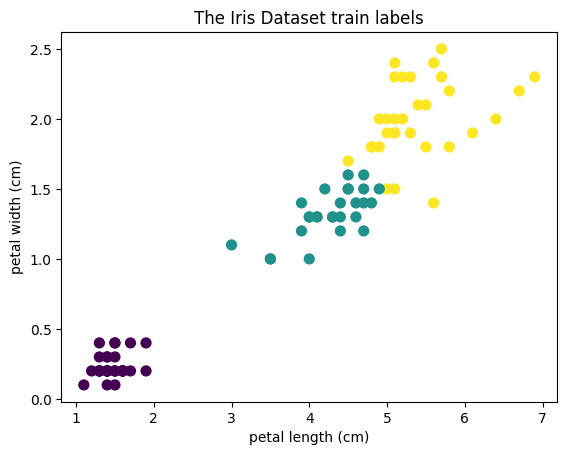

In [28]:
#plot the train data set
plotData(trainData, names,trainLabels,"train")

In [29]:
# generate a linear SVM model and fit the train data
svmModel= svm.SVC(kernel='linear',C=10) #c=1 , c=10, c=100
svmModel.fit(trainData, trainLabels)
predictedLabels = svmModel.predict(testData)

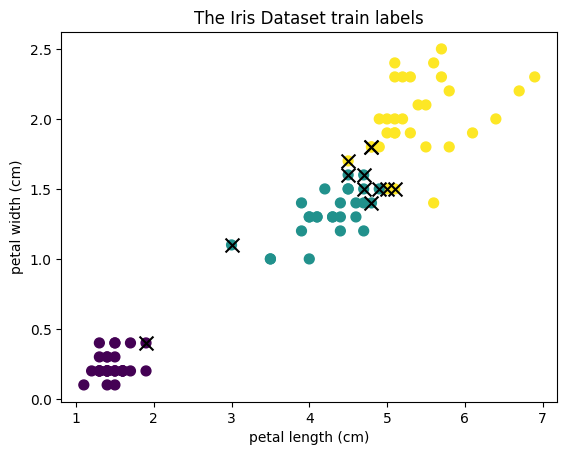

In [30]:
# get and plot the support vectors
supportV = svmModel.support_vectors_
plotData(trainData, names,trainLabels,"train",supportV)

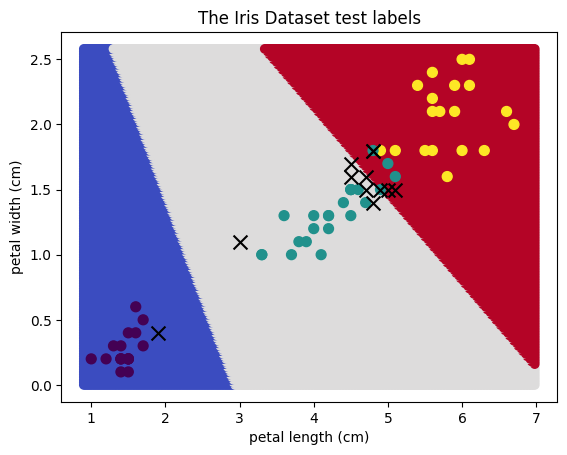

In [31]:
plotGrid(data,svmModel)
plotData(testData, names,testLabels,"test",supportV)

In [32]:
def predict_blobs(n_samples=200,n_features=2,centers=([(5,5),(-5,-5)]),cluster_std=(0.5,0.2)):

    # generate random values
    X, trainData = make_blobs(n_samples=n_samples, n_features = n_features, centers=centers,
                       cluster_std = cluster_std, random_state = 5)
    plotData(X , trainData);

# Plot the data with the predicted labels
    k = len(centers)
    kmeans = KMeans(k, random_state = 5)
    kmeans = kmeans.fit(X)
    predictedLabels = kmeans.predict(X)
    plotData(X , predictedLabels,kmeans.cluster_centers_)

In [33]:
predict_blobs(n_samples=200,n_features=2,centers=([(1,1),(-1,-1)]),cluster_std=(0.5,0.5))
predict_blobs(n_samples=200,n_features=2,centers=([(1,1),(-1,-1)]),cluster_std=(0.5,0.5))
predict_blobs(n_samples=200,n_features=2,centers=([(1,1),(-1,-1)]),cluster_std=(0.5,0.5))
predict_blobs(n_samples=200,n_features=2,centers=([(1,1),(-1,-1)]),cluster_std=(0.5,0.5))

NameError: name 'make_blobs' is not defined

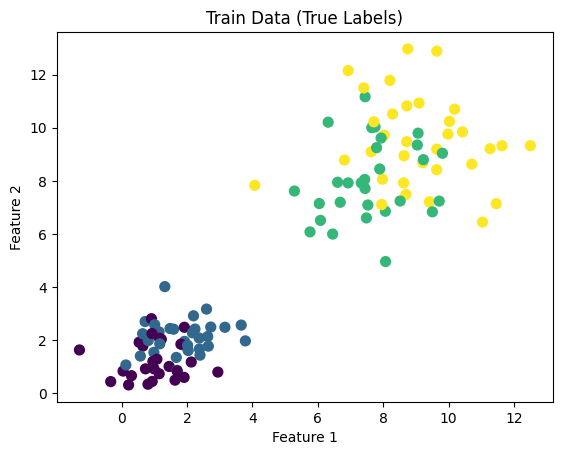

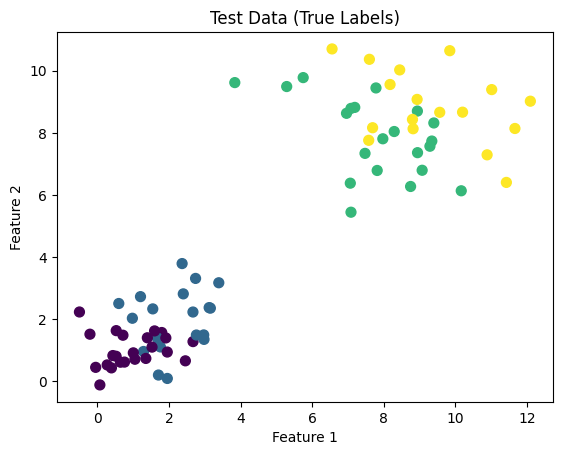

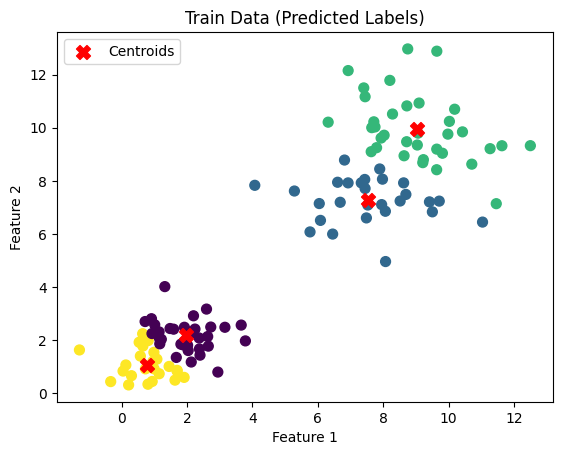

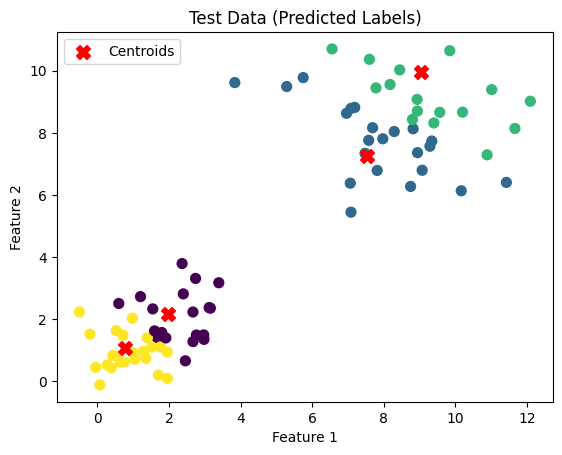

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Reusable function for plotting data
def plotData(data, labels, title, centroids=None):
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50)
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label="Centroids")
        plt.legend()
    plt.show()

# Updated predict_blobs function
def predict_blobs(
    n_samples=200,
    n_features=2,
    centers=None,
    cluster_std=None,
    random_state=5,
    test_size=0.4
):
    # Generate random data
    X, true_labels = make_blobs(
        n_samples=n_samples,
        n_features=n_features,
        centers=centers,
        cluster_std=cluster_std,
        random_state=random_state
    )

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, true_labels, test_size=test_size, random_state=random_state
    )

    # Plot the training and test datasets
    plotData(X_train, y_train, title="Train Data (True Labels)")
    plotData(X_test, y_test, title="Test Data (True Labels)")

    # Apply KMeans clustering on training data
    kmeans = KMeans(n_clusters=len(centers), random_state=random_state)
    kmeans.fit(X_train)

    # Predict on train and test data
    train_predicted_labels = kmeans.predict(X_train)
    test_predicted_labels = kmeans.predict(X_test)

    # Plot the predicted clusters for train and test datasets
    plotData(X_train, train_predicted_labels, title="Train Data (Predicted Labels)", centroids=kmeans.cluster_centers_)
    plotData(X_test, test_predicted_labels, title="Test Data (Predicted Labels)", centroids=kmeans.cluster_centers_)

# Call the function with different centers and std deviations
predict_blobs(
    n_samples=200,
    n_features=2,
    centers=[(1, 1), (2, 2), (8, 8), (9, 9)],
    cluster_std=[0.8, 0.8, 1.5, 1.5]
)
